<a href="https://colab.research.google.com/github/ferhatSF/Tensorflow-Studies/blob/master/Eager_Execution_GradientTape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Eager Execution GradientTape Optimization

TensorFlow 1.x Eager Execution Model

Python 3.x
numpy
matplotlib

by Ferhat Hatay


#GITHUB clone from public repository
https://github.com/ferhatSF/Tensorflow-Studies

In [1]:
github_user="ferhatSF"
github_repository="TensorFlow-Studies"
!rm -rf {github_repository}
!git clone https://github.com/{github_user}/{github_repository}.git

Cloning into 'TensorFlow-Studies'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 58 (delta 19), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (58/58), done.


In [2]:
import os
import sys

from inspect import getsourcefile
from os.path import abspath

CURRENT_DIR = os.path.dirname(abspath(getsourcefile(lambda:0)))
PARENT_DIR  = os.path.join   (CURRENT_DIR,github_repository)
INCLUDE_DIR = os.path.join   (PARENT_DIR,"INCLUDE")
OUTPUT_DIR  = os.path.join   (PARENT_DIR,"OUTPUT")
sys.path.append(INCLUDE_DIR)
sys.path.append(PARENT_DIR)

print()
print("==========================================================")
print("CURRENT DIR: ",CURRENT_DIR)
print("PARENT  DIR: ",PARENT_DIR)
print("INCLUDE DIR: ",INCLUDE_DIR)
print("OUTPUT  DIR: ",OUTPUT_DIR)
print("==========================================================")
print()


CURRENT DIR:  /content
PARENT  DIR:  /content/TensorFlow-Studies
INCLUDE DIR:  /content/TensorFlow-Studies/INCLUDE
OUTPUT  DIR:  /content/TensorFlow-Studies/OUTPUT



#SETUP

imports and
function definitions

In [3]:
from __future__ import absolute_import
from __future__ import division, print_function, unicode_literals

import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

from generate_dataset import generate_dataset
from plot_data        import plot_data
from plot_convergence import plot_convergence

TensorFlow version: 1.13.1
Eager execution: True


##Setup a Linear Regression Model


y = W x + b

In [0]:
class Model(object):
    def __init__(self,Bull,W_actual,b_actual):
        self.W_actual      = W_actual
        self.b_actual      = b_actual
        self.BullsEyeGuess = BullsEyeGuess
        
        self.W = tf.Variable   (Bull*W_actual+(1-Bull)*np.random.normal(), name='W')
        self.b = tf.Variable   (Bull*b_actual+(1-Bull)*np.random.normal(), name='b')
    
    def __call__(self, x):
        return self.W * x + self.b

In [0]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [0]:
def train(model, inputs, outputs, learn_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
        dW, db = t.gradient(current_loss, [model.W, model.b])
        model.W.assign_sub(learn_rate * dW)
        model.b.assign_sub(learn_rate * db)

In [0]:
def optimize (model, x_data, y_data,
              iterations=10, 
              learn_rate=0.1,):

    epochs       = range(iterations)
    loss_history = []
    W_history    = []
    b_history    = []
            
    for epoch in epochs:
        W_history.append(model.W.numpy())
        b_history.append(model.b.numpy())
        current_loss = loss(model(x_data), y_data)
        loss_history.append(current_loss.numpy())    
        train(model, x_data, y_data, learn_rate)

    return(epochs, loss_history, W_history, b_history)

#SETUP THE DATA

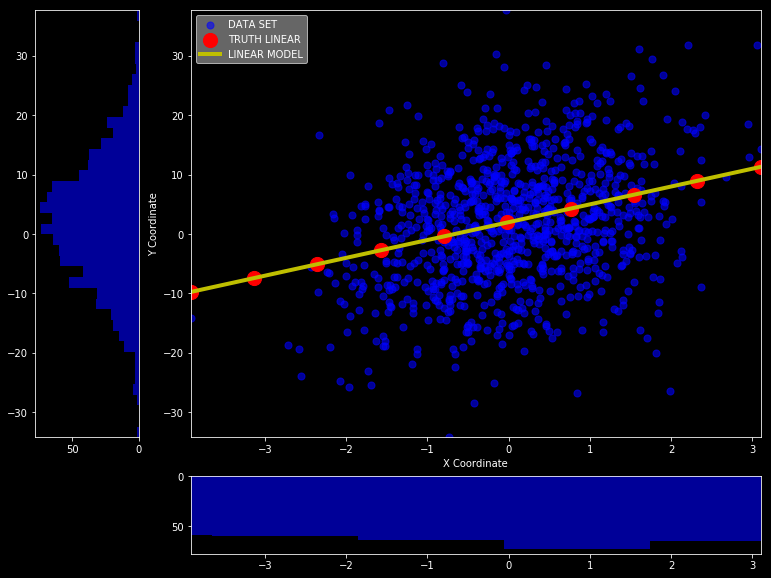

In [8]:
W_actual = 3 #@param {type:"slider", min:0, max:10, step:0.1}
b_actual = 2 #@param {type:"slider", min:0, max:10, step:0.1}

npoints  = 1000 #@param {type:"slider", min:0, max:10000, step:100}
x_start  = 0 #@param {type:"slider", min:-10, max:10, step:0.1}
x_range  = 1 #@param {type:"slider", min:0.1, max:10, step:0.1}
x_random = True #@param {type:"boolean"}

noise_amplitude = 10 #@param {type:"slider", min:0, max:10, step:0.1}


x_data, y_data, x_true, y_true = generate_dataset(
    W_actual        = W_actual, 
    b_actual        = b_actual,
    npoints         = npoints, 
    x_random        = x_random,
    x_start         = x_start,
    x_range         = x_range, 
    noise_amplitude = noise_amplitude)

plot_data(x_data, y_data, [], x_true, y_true)

#OPTIMIZE

INITIATING A NEW MODEL
Current loss: 
Instructions for updating:
Colocations handled automatically by placer.
111.31483


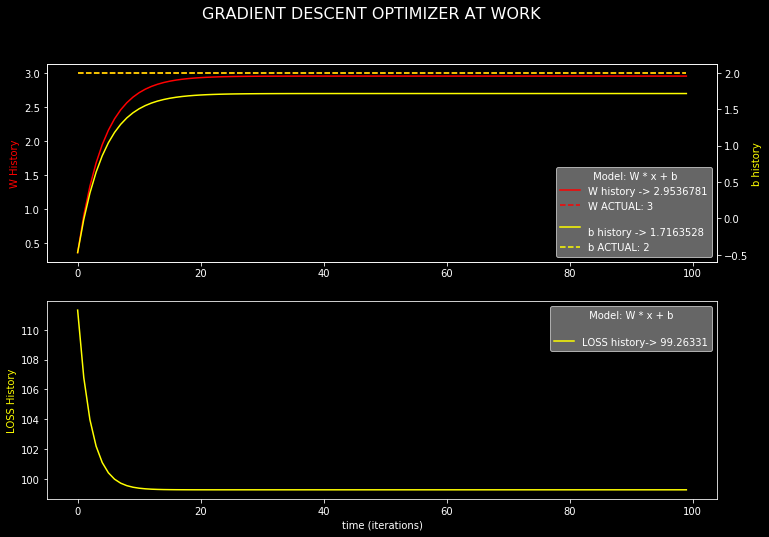

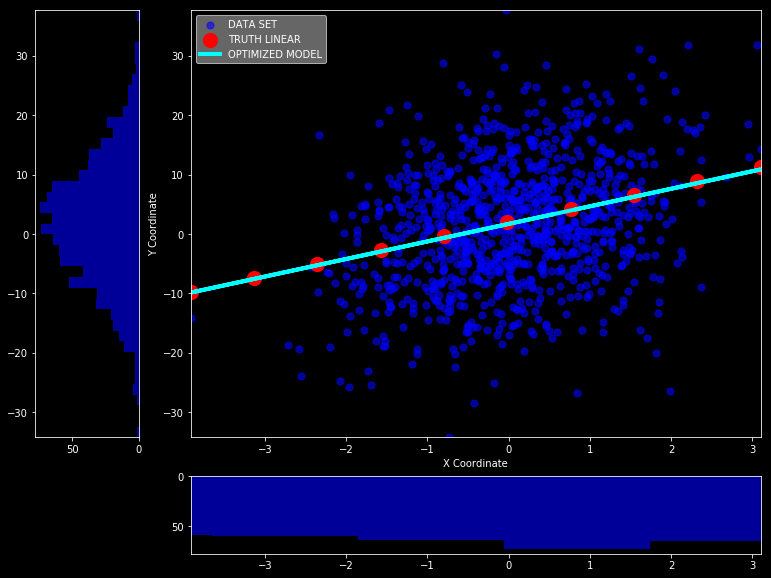

In [9]:
BullsEyeGuess = False #@param {type:"boolean"}
if BullsEyeGuess:
    Bull=1
else:
    Bull=0
    
learn_rate    = 0.1 #@param {type:"slider", min:0, max:1, step:0.01}
iterations    = 100 #@param {type:"slider", min:10, max:10000, step:10}

try:
    opt_model
except NameError:
    print("INITIATING A NEW MODEL")
else:
    print("REMOVING THE EXISTING MODEL")
    print("INITIATING A NEW MODEL")
opt_model = Model(Bull,W_actual,b_actual)
print('Current loss: '),
print(loss(opt_model(x_data), y_data).numpy())

epochs, loss_history, W_history, b_history = optimize( 
                                 opt_model, x_data, y_data,
                                 iterations=iterations,
                                 learn_rate=learn_rate)

plot_convergence(loss_history, W_history, b_history,  W_actual, b_actual)
plot_data(x_data, y_data, opt_model(x_data), x_true, y_true)